In [1]:
%matplotlib inline

In [2]:
# Add the dependencies
import pandas as pd
import os

# Load the schools and students data
# Use the "clean" student data provided
school_data_to_load = os.path.join("Resources", "schools_complete.csv")
student_data_to_load = os.path.join("Resources", "clean_students_complete.csv")

# Read the school and student data files and store in a Pandas DataFrame.
school_data_df = pd.read_csv(school_data_to_load)
student_data_df = pd.read_csv(student_data_to_load)

display(school_data_df.head())
display(student_data_df.head())

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [3]:
# For some reason, the student df had an extra column
# remove it with del
del student_data_df['Unnamed: 0']
student_data_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [4]:
# Merge the school and student data frames
school_data_complete_df = pd.merge(student_data_df, school_data_df, on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [5]:
school_data_complete_df.dtypes

Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
School ID         int64
type             object
size              int64
budget            int64
dtype: object

In [6]:
# Get the number of students
# We use a specific column, otherwise count() will return a list of the counts for every column 
# (which will all be the same since the data is "clean")
student_count=school_data_complete_df['Student ID'].count()

# Get the number of schools
# Use the school_data since it has only one listing for each school
school_count = school_data_df["school_name"].count()
# Find total budget
total_budget=school_data_df["budget"].sum()

display(school_count)
display(student_count)
display(total_budget)

15

39170

24649428

In [7]:
# Find mean reading and math scores
mean_reading_score=student_data_df["reading_score"].mean()
mean_math_score=student_data_df["math_score"].mean()
print({mean_reading_score,mean_math_score})

{81.87784018381414, 78.98537145774827}


In [8]:
# Find out who is passing reading and math - returns Boolean true/false
passing_math = school_data_complete_df[school_data_complete_df["math_score"] >= 70]
passing_reading = school_data_complete_df[school_data_complete_df["reading_score"] >= 70]

display(passing_math.head())
display(passing_reading.head())

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635


In [9]:
# Calculate the number of students passing math and reading
passing_math_count=passing_math['Student ID'].count()
passing_reading_count=passing_reading['Student ID'].count()

# Calculate percentage passing math and reading
passing_math_percentage=passing_math_count / student_count*100
passing_reading_percentage=passing_reading_count / student_count *100

# Calculate students who passed both math and reading
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]
passing_math_reading_count=passing_math_reading["student_name"].count()
passing_math_reading_percentage = passing_math_reading_count / student_count *100

display({passing_math_count,passing_reading_count,passing_math_reading_count})
display(passing_math_reading_count)  # why did it display this one first in the previous line when it was listed third?
display(passing_math_percentage)
display(passing_reading_percentage)
display(passing_math_reading_percentage)
display({passing_math_percentage,passing_reading_percentage,passing_math_reading_percentage})
# why does it display the third one (math and reading) first?


{25528, 29370, 33610}

25528

74.9808526933878

85.80546336482001

65.17232575950983

{65.17232575950983, 74.9808526933878, 85.80546336482001}

In [10]:
# Adding a list of values with keys to create a new DataFrame.
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count,
          "Total Students": student_count,
          "Total Budget": total_budget,
          "Average Math Score": mean_math_score,
          "Average Reading Score": mean_reading_score,
          "% Passing Math": passing_math_percentage,
         "% Passing Reading": passing_reading_percentage,
        "% Overall Passing": passing_math_reading_percentage}])

# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
# Format "Total Budget" to have the comma for a thousands separator, a decimal separator, and a "$".
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
# Format math and reading scores to have 1 decimal place.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)
# Format percent passing math and readin to whole numbers.
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.0f}".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.0f}".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.0f}".format)

# Reorder the columns in the order you want them to appear.
new_column_order = ["Total Schools", "Total Students", "Total Budget","Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]
# Assign district summary df the new column order.
district_summary_df = district_summary_df[new_column_order]
district_summary_df

district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",79.0,81.9,75,86,65


In [11]:
district_summary_df.dtypes

Total Schools             int64
Total Students           object
Total Budget             object
Average Math Score       object
Average Reading Score    object
% Passing Math           object
% Passing Reading        object
% Overall Passing        object
dtype: object

In [12]:
# Calculate metrics by school
# Determine the school type.
per_school_types = school_data_df.set_index(["school_name"])["type"]
# Add the per_school_types into a DataFrame for testing.
df = pd.DataFrame(per_school_types)
df

,type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


In [13]:
# Calculate the total student count.
per_school_counts = school_data_df.set_index(["school_name"])["size"]
# Calculate the total school budget.
per_school_budget = school_data_df.set_index(["school_name"])["budget"]
# Calculate the per capita spending.
per_school_capita = per_school_budget / per_school_counts
# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

# Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]
# Calculate the number of students passing math and passing reading by school.
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]
per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]
# Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100
per_school_passing_reading = per_school_passing_reading / per_school_counts * 100
# Calculate the students who passed both math and reading.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & (school_data_complete_df["reading_score"] >= 70)]
# Calculate the number of students who passed both math and reading.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]
# Calculate the overall passing percentage.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100

In [14]:
# Use Previous calcs to create a "per school" data frame
per_school_summary_df = pd.DataFrame({
             "School Type": per_school_types,
             "Total Students": per_school_counts,
             "Total School Budget": per_school_budget,
             "Per Student Budget": per_school_capita,
             "Average Math Score": per_school_math,
           "Average Reading Score": per_school_reading,
           "% Passing Math": per_school_passing_math,
           "% Passing Reading": per_school_passing_reading,
           "% Overall Passing": per_overall_passing_percentage})

# Format the values in the data frame
#per_school_summary_df["Total Students"] = per_school_summary_df["Total Students"].map("{:,}".format)
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.0f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.0f}".format)
per_school_summary_df["Average Math Score"] = per_school_summary_df["Average Math Score"].map("{:,.1f}".format)
per_school_summary_df["Average Reading Score"] = per_school_summary_df["Average Reading Score"].map("{:,.1f}".format)
per_school_summary_df["% Passing Math"] = per_school_summary_df["% Passing Math"].map("{:,.0f}".format)
per_school_summary_df["% Passing Reading"] = per_school_summary_df["% Passing Reading"].map("{:,.0f}".format)
per_school_summary_df["% Overall Passing"] = per_school_summary_df["% Overall Passing"].map("{:,.0f}".format)

# Remove the index name
per_school_summary_df.index.name = None

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928",$628,77.0,81.0,67,82,55
Cabrera High School,Charter,1858,"$1,081,356",$582,83.1,84.0,94,97,91
Figueroa High School,District,2949,"$1,884,411",$639,76.7,81.2,66,81,53
Ford High School,District,2739,"$1,763,916",$644,77.1,80.7,68,79,54
Griffin High School,Charter,1468,"$917,500",$625,83.4,83.8,93,97,91


In [15]:
display(per_school_summary_df.dtypes)
# for some reason, the dtypes are all objects
# can fix this...
# per_school_summary_df.astype('int32').dtypes
#display(per_school_summary_df.dtypes)

School Type              object
Total Students            int64
Total School Budget      object
Per Student Budget       object
Average Math Score       object
Average Reading Score    object
% Passing Math           object
% Passing Reading        object
% Overall Passing        object
dtype: object

In [16]:
# Sort and show top five schools.
# ascending=TRUE is the default (lowest to highest)
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)
display(top_schools.head())
display(bottom_schools.head())

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356",$582,83.1,84.0,94,97,91
Griffin High School,Charter,1468,"$917,500",$625,83.4,83.8,93,97,91
Pena High School,Charter,962,"$585,858",$609,83.8,84.0,95,96,91
Thomas High School,Charter,1635,"$1,043,130",$638,83.4,83.8,93,97,91
Wilson High School,Charter,2283,"$1,319,574",$578,83.3,84.0,94,97,91


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Figueroa High School,District,2949,"$1,884,411",$639,76.7,81.2,66,81,53
Rodriguez High School,District,3999,"$2,547,363",$637,76.8,80.7,66,80,53
Ford High School,District,2739,"$1,763,916",$644,77.1,80.7,68,79,54
Hernandez High School,District,4635,"$3,022,020",$652,77.3,80.9,67,81,54
Huang High School,District,2917,"$1,910,635",$655,76.6,81.2,66,81,54


In [17]:
# Grade-Level Data Frames
ninth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "9th")]
tenth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "10th")]
eleventh_graders = school_data_complete_df[(school_data_complete_df["grade"] == "11th")]
twelfth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "12th")]

# Group each grade level DataFrame by the school name for the average math score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]
twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]
twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

twelfth_grade_reading_scores

school_name
Bailey High School       80.912451
Cabrera High School      84.287958
Figueroa High School     81.384863
Ford High School         80.662338
Griffin High School      84.013699
Hernandez High School    80.857143
Holden High School       84.698795
Huang High School        80.305983
Johnson High School      81.227564
Pena High School         84.591160
Rodriguez High School    80.376426
Shelton High School      82.781671
Thomas High School       83.831361
Wilson High School       84.317673
Wright High School       84.073171
Name: reading_score, dtype: float64

In [18]:
# Combine into Data Frames...
math_scores_by_grade=pd.DataFrame({
    "9th":ninth_grade_math_scores,
    "10th":tenth_grade_math_scores,
    "11th":eleventh_grade_math_scores,
    "12th":twelfth_grade_math_scores
})
# Remove the index name.
math_scores_by_grade.index.name = None
    
reading_scores_by_grade=pd.DataFrame({
    "9th":ninth_grade_reading_scores,
    "10th":tenth_grade_reading_scores,
    "11th":eleventh_grade_reading_scores,
    "12th":twelfth_grade_reading_scores
})
reading_scores_by_grade.index.name = None

# Format the grades
# First, create a list of grades, then use in loop
grades=["9th","10th","11th","12th"]
for grade in grades:
    math_scores_by_grade[grade]=math_scores_by_grade[grade].map("{:.1f}".format)
    reading_scores_by_grade[grade]=reading_scores_by_grade[grade].map("{:.1f}".format)

display(math_scores_by_grade)
display(reading_scores_by_grade)

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9
Pena High School,83.6,83.4,84.3,84.1


,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2
Pena High School,83.8,83.6,84.3,84.6


In [19]:
# How does school spending per student affect passing percentages?
# Get the descriptive statistics for the per_school_capita.
per_school_capita.describe()

count     15.000000
mean     620.066667
std       28.544368
min      578.000000
25%      591.500000
50%      628.000000
75%      641.500000
max      655.000000
dtype: float64

In [20]:
# Define the spending bins and place data into bins ("cut")
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$584", "$585-629", "$630-644", "$645-675"]
#per_school_capita.groupby(pd.cut(per_school_capita, spending_bins)).count()

In [21]:
# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=group_names)
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928",$628,77.0,81.0,67,82,55,$585-629
Cabrera High School,Charter,1858,"$1,081,356",$582,83.1,84.0,94,97,91,<$584
Figueroa High School,District,2949,"$1,884,411",$639,76.7,81.2,66,81,53,$630-644
Ford High School,District,2739,"$1,763,916",$644,77.1,80.7,68,79,54,$630-644
Griffin High School,Charter,1468,"$917,500",$625,83.4,83.8,93,97,91,$585-629


In [22]:
# Need to change the data types of a few of the columns from "object" to "float" so we can do calculations with them later
per_school_summary_df[['Average Math Score','Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']] = per_school_summary_df[['Average Math Score','Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']].astype('float')

per_school_summary_df.dtypes

School Type                        object
Total Students                      int64
Total School Budget                object
Per Student Budget                 object
Average Math Score                float64
Average Reading Score             float64
% Passing Math                    float64
% Passing Reading                 float64
% Overall Passing                 float64
Spending Ranges (Per Student)    category
dtype: object

In [23]:
# Calculate averages for the desired columns.
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

overall_passing_spending

Spending Ranges (Per Student)
<$584       90.25
$585-629    81.75
$630-644    62.75
$645-675    54.00
Name: % Overall Passing, dtype: float64

In [24]:
# Assemble into DataFrame.
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.475,83.950000,93.500000,96.75,90.25
$585-629,81.900,83.125000,87.250000,92.75,81.75
$630-644,78.500,81.600000,73.250000,84.25,62.75
$645-675,77.000,81.033333,66.333333,81.00,54.00


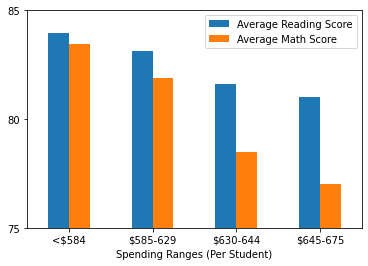

In [25]:
# The more you spend, the lower the grade?!?
ylim=(75, 85)
yticks=(75,80,85)
spending_scores_plot=spending_summary_df.plot(y=['Average Reading Score','Average Math Score'],kind='bar',ylim=ylim,yticks=yticks,rot=0)

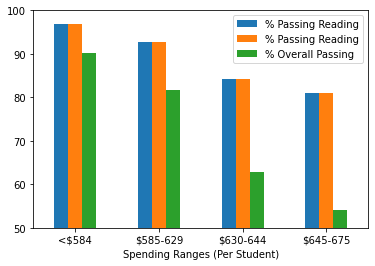

In [26]:
# The more you spend, the lower the grade?!?
ylim=(50, 100)
yticks=(50,60,70,80,90,100)
spending_passing_plot=spending_summary_df.plot(y=['% Passing Reading','% Passing Reading','% Overall Passing'],kind='bar',ylim=ylim,yticks=yticks,rot=0)

In [27]:
# Formating the date frame
columnLabels=spending_summary_df.columns
for label in columnLabels:
    spending_summary_df[label]=spending_summary_df[label].astype('float')

display(spending_summary_df.dtypes)
display(spending_summary_df)



Average Math Score       float64
Average Reading Score    float64
% Passing Math           float64
% Passing Reading        float64
% Overall Passing        float64
dtype: object

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.475,83.950000,93.500000,96.75,90.25
$585-629,81.900,83.125000,87.250000,92.75,81.75
$630-644,78.500,81.600000,73.250000,84.25,62.75
$645-675,77.000,81.033333,66.333333,81.00,54.00


In [28]:
# Look at data by school size
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=group_names)
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928",$628,77.0,81.0,67.0,82.0,55.0,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356",$582,83.1,84.0,94.0,97.0,91.0,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411",$639,76.7,81.2,66.0,81.0,53.0,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916",$644,77.1,80.7,68.0,79.0,54.0,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500",$625,83.4,83.8,93.0,97.0,91.0,$585-629,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020",$652,77.3,80.9,67.0,81.0,54.0,$645-675,Large (2000-5000)
Holden High School,Charter,427,"$248,087",$581,83.8,83.8,93.0,96.0,89.0,<$584,Small (<1000)
Huang High School,District,2917,"$1,910,635",$655,76.6,81.2,66.0,81.0,54.0,$645-675,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650",$650,77.1,81.0,66.0,81.0,54.0,$645-675,Large (2000-5000)
Pena High School,Charter,962,"$585,858",$609,83.8,84.0,95.0,96.0,91.0,$585-629,Small (<1000)


In [29]:
# Calculate averages for the desired columns.
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

# Assemble into DataFrame.
size_summary_df = pd.DataFrame({
          "Average Math Score" : size_math_scores,
          "Average Reading Score": size_reading_scores,
          "% Passing Math": size_passing_math,
          "% Passing Reading": size_passing_reading,
          "% Overall Passing": size_overall_passing})

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8000,83.9000,94.0,96.00,90.0
Medium (1000-2000),83.4000,83.8600,93.4,96.80,90.6
Large (2000-5000),77.7375,81.3375,70.0,82.75,58.5
